In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import pdb
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', header=0, encoding='iso-8859-1')
df_test = pd.read_csv('test.csv', header=0, encoding='iso-8859-1')
df_att = pd.read_csv('attributes.csv', header=0, encoding='iso-8859-1')
df_des = pd.read_csv('product_descriptions.csv', header=0, encoding='iso-8859-1')

## Num of search term distribution

In [3]:
def search_term_analysis(df, comment):
    search_terms = [search_term.split() for search_term in df.search_term]
    num_words_used = [len(search_term) for search_term in search_terms]
    avg_terms_used = sum(num_words_used) / float(len(search_terms))
    print 'num_words_used: {}'.format(Counter(num_words_used))
    print 'avg_terms_used: {}'.format(avg_terms_used)
    
    return search_terms

In [4]:
df_train.head()
df_train.describe()
search_terms_train = search_term_analysis(df_train, 'Training Data...')

num_words_used: Counter({3: 26575, 2: 18386, 4: 14847, 5: 6601, 1: 4503, 6: 2076, 7: 741, 8: 204, 9: 80, 11: 31, 10: 10, 12: 9, 14: 4})
avg_terms_used: 3.15920720429


In [5]:
df_test.head()
search_terms_test = search_term_analysis(df_test, 'Training Data...')

num_words_used: Counter({3: 56420, 2: 51329, 4: 28100, 1: 12772, 5: 12004, 6: 4004, 7: 1241, 8: 469, 9: 145, 10: 104, 12: 54, 11: 46, 14: 4, 13: 1})
avg_terms_used: 2.98237478478


## Num of unique products

In [6]:
print 'training data - num of records: {0}, num unique products: {1}'.format(len(df_train), len(set(df_train.product_uid)))
print 'testing data - num of records: {0}, num unique products: {1}'.format(len(df_test), len(set(df_test.product_uid)))

training data - num of records: 74067, num unique products: 54667
testing data - num of records: 166693, num unique products: 97460


## Group by num of search terms

In [7]:
search_by_num_words = defaultdict(list)
for search_term in search_terms_train + search_terms_test:
    search_by_num_words[len(search_term)].append(search_term)
search_by_num_words[1]

[[u'microwaves'],
 [u'disposer'],
 [u'bamboo'],
 [u'grayson'],
 [u'post'],
 [u'outdoorfurniture'],
 [u'wiremesh'],
 [u'post'],
 [u'4x6'],
 [u'melnor'],
 [u'deckpaint'],
 [u'silicone'],
 [u'chipper'],
 [u'bidet'],
 [u'slatwall'],
 [u'respirator'],
 [u'lamp'],
 [u'Lawnmowers'],
 [u'closetmade'],
 [u'closetmaid'],
 [u'post'],
 [u'omnifilter'],
 [u'colosso'],
 [u'respirator'],
 [u'miricale'],
 [u'sheetrock'],
 [u'bathrooms'],
 [u'bootz'],
 [u'porcelain'],
 [u'aspiradora'],
 [u'shredder'],
 [u'chipper'],
 [u'Fuses'],
 [u'home-flex'],
 [u'knob'],
 [u'Lawnmowers'],
 [u'hindges'],
 [u'lathe'],
 [u'roller'],
 [u'clab'],
 [u'chaise'],
 [u'tent'],
 [u'cieling'],
 [u'gates'],
 [u'ceadar'],
 [u'pruners'],
 [u'barreir'],
 [u'water'],
 [u'azek'],
 [u'azek'],
 [u'closetmaid'],
 [u'stringer'],
 [u'thermoclear'],
 [u'stakes'],
 [u'slatwall'],
 [u'roller'],
 [u'slatwall'],
 [u'roller'],
 [u'huskvarna'],
 [u'post'],
 [u'plywoods'],
 [u'artificial'],
 [u'canopy'],
 [u'awnings'],
 [u'frp'],
 [u'rounds'],
 [

In [8]:
y_train = df_train.relevance

In [9]:
# merge training and testing data sets to single dataframe

df_train_copy = df_train.drop('relevance', axis=1)
df_train_copy['dataset'] = 'train'

df_test_copy = df_test.copy()
df_test_copy['dataset'] = 'test'

df = pd.concat([df_train_copy, df_test_copy], ignore_index=True)

## Are all products in product description?

In [10]:
unique_uids = set(df_des.product_uid.values)
len(filter(lambda uid: uid in unique_uids, df.product_uid.values)) / float(len(df.product_uid.values))

1.0

## Merge data with descriptions

In [11]:
df = pd.merge(df, df_des, how='left', on='product_uid')
df.head()

,id,product_uid,product_title,search_term,dataset,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,train,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,train,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,train,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,train,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,train,Update your bathroom with the Delta Vero Singl...


In [13]:
df_pivoted_attributes = get_attributes_pivoted_df()

## Feature Engineering

In [130]:
df1 = df.copy()
df1.set_index('id', inplace=True)

In [131]:
# import re
# pattern_replace = []
# pattern_replace.append(('(\d?/?\d)(\s?)(-?)(in\s|in\.?\s|inchs?|inches)(?i)', r'\1inch '))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(ft\.?|foot|feet)(?i)', r'\1ft.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(pounds?|lb\.?)(?i)', r'\1lb.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(square|sq)(\.?\s?)(ft\.?|foot|feet)(?i)', r'\1sq.ft.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(cubic|cu)(\.?\s?)(ft\.?|foot|feet)(?i)', r'\1cu.ft.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(gallons?|gal\.?)(?i)', r'\1gal.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(ounces?|ounce|oz\.?)(?i)', r'\1oz.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(amperes?|amp\.?s?)(?i)', r'\1amp.'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(volt|volts)(?i)', r'\1volts'))            
# pattern_replace.append(('(\d?/?\d)(\s?-?)(watt|watts)(?i)', r'\1watts'))
# pattern_replace.append(('(\d?_/?\d)(\s?-?)(mm\.?|millimeter)(?i)', r'\1mm'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(cm\.?|centimeter)(?i)', r'\1cm'))
# pattern_replace.append(('(\d?/?\d)(\s?-?)(m\.?|meter)(?i)', r'\1m'))
# pattern_replace.append(('-', ' '))    
# pattern_replace.append(('(\(|\))', ''))
# pattern_replace.append(('refridgerator', 'fridge'))
# pattern_replace.append(('refridgerator', 'fridge'))
# pattern_replace.append(('(\d)(")', '\1inch')) 
# pattern_replace.append(("(\d)(')", '\1ft.'))
# pattern_replace.append((" x ", ' x')) 

In [132]:
# for (pattern, replace) in pattern_replace:
    
#     print 'pattern: {}'.format(pattern)
#     print 'modified elements [search]: {}'.format(
#         len([search for search in df1.search_term if re.search(pattern, search)]))

#     print 'modified elements [product-title]: {}'.format(
#         len([search for search in df1.product_title if re.search(pattern, search)]))
        
#     orig_rep_search = [(search, re.sub(pattern, replace, search)) 
#                        for search in df1.search_term if re.search(pattern, search)]

#     orig_rep_title = [(product_title, re.sub(pattern, replace, product_title)) 
#                       for product_title in df1.product_title if re.search(pattern, product_title)]
        
#     df1.search_term = df1.search_term.map(lambda x: re.sub(pattern, replace, x))
    
#     df1.product_title = df1.product_title.map(lambda x: re.sub(pattern, replace, x))

In [133]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
import unicodedata
strNum = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9}

def str_stem(s):
    s = unicodedata.normalize('NFD', unicode(s)).encode('ascii', 'ignore')
    s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s) #Split words with a.A
    s = s.lower()
    s = s.replace("  ", " ")
    s = s.replace(",", "") #could be number / segment later
    s = s.replace("$", " ")
    s = s.replace("?", " ")
    s = s.replace("-", " ")
    s = s.replace("//", "/")
    s = s.replace("..", ".")
    s = s.replace(" / ", " ")
    s = s.replace(" \\ ", " ")
    s = s.replace(".", " . ")
    s = re.sub(r"(^\.|/)", r"", s)
    s = re.sub(r"(\.|/)$", r"", s)
    s = re.sub(r"([0-9])([a-z])", r"\1 \2", s)
    s = re.sub(r"([a-z])([0-9])", r"\1 \2", s)
    s = s.replace(" x ", " xbi ")
    s = re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s)
    s = re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s)
    s = s.replace("*", " xbi ")
    s = s.replace(" by ", " xbi ")
    s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
    s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
    s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
    s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
    s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
    s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
    s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
    s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
    s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
    s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
    s = s.replace("°", " degrees ")
    s = re.sub(r"([0-9]+)( *)(degrees|degree)\.?", r"\1deg. ", s)
    s = s.replace(" v ", " volts ")
    s = re.sub(r"([0-9]+)( *)(volts|volt)\.?", r"\1volt. ", s)
    s = re.sub(r"([0-9]+)( *)(watts|watt)\.?", r"\1watt. ", s)
    s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1amp. ", s)
    s = s.replace("  ", " ")
    s = s.replace(" . ", " ")
    s = (" ").join([str(strNum[z]) if z in strNum else z for z in s.split(" ")])
    s = (" ").join([stemmer.stem(z) for z in s.split(" ")])
    s = s.lower()
    s = s.replace("toliet", "toilet")
    s = s.replace("airconditioner", "air conditioner")
    s = s.replace("vinal", "vinyl")
    s = s.replace("vynal", "vinyl")
    s = s.replace("skill", "skil")
    s = s.replace("snowbl", "snow bl")
    s = s.replace("plexigla", "plexi gla")
    s = s.replace("rustoleum", "rust oleum")
    s = s.replace("whirpool", "whirlpool")
    s = s.replace("whirlpoolga", "whirlpool ga")
    s = s.replace("whirlpoolstainless", "whirlpool stainless")
    return s

df1.search_term = df1.search_term.map(str_stem)
df1.product_title = df1.product_title.map(str_stem)
df_att.value = df_att.value.map(str_stem)
# df1.product_description = df1.product_description.map(str_stem)

### Merge data with attributes

In [134]:
def get_attributes_pivoted_df():

    def filter_attributes(row):
        if (row[0], row[1]) in filter_set:
            return 0
        return 1

    by_attribute = df_att.groupby(['product_uid', 'name']).count()
    filter_set = by_attribute[by_attribute.value > 1].reset_index()[['product_uid', 'name']].values
    filter_set = set([(uid, name) for uid, name in filter_set.tolist()])
    
    _df = df_att.copy()
    _df['keep'] = df_att.apply(filter_attributes, axis=1)
    _df = _df[_df['keep'] == 1]
    _df = _df.dropna(how='any')
    _df = _df.pivot(index='product_uid', columns='name', values='value')
    _df.reset_index(inplace=True)
    
    return _df

### Latent Semantic Analysis - TF-IDF + TSVD 

In [135]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

def lemma(word):
    try:
        return lmtzr.lemmatize(word.encode('ascii', 'ignore'))
    except:
        return word
    
def text_transformer(_df, _field):

    text_array = _df[_field]
    text_array_copy = text_array.map(lambda words: ' '.join([lemma(word) for word in words.split(' ')]))
    
    tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
    tsvd = TruncatedSVD(n_components=10, random_state=0)
    
    tfidf.fit(text_array)
    mx_tfidf = tfidf.transform(text_array)
    
    tsvd.fit(mx_tfidf)
    tsvd_tfidf = tsvd.transform(mx_tfidf)
    
    return tsvd_tfidf

In [136]:
search_terms_ns = text_transformer(df1, 'search_term')
product_titles_ns = text_transformer(df1, 'product_title')
# product_description_ns = text_transformer(df1, 'product_description')

In [137]:
df_search_terms = pd.DataFrame(search_terms_ns, index=df1.index, columns=['search_term_ns_' + str(x) 
                                                         for x in xrange(search_terms_ns.shape[1])])
df_product_titles = pd.DataFrame(product_titles_ns, index=df1.index, columns=['product_titles_ns_' + str(x) 
                                                         for x in xrange(product_titles_ns.shape[1])])
# df_product_descriptions = pd.DataFrame(product_description_ns, index=df1.index, columns=['product_description_ns_' + str(x) 
#                                                          for x in xrange(product_description_ns.shape[1])])

In [138]:
df1 = pd.concat([df1, df_search_terms, df_product_titles], axis=1, ignore_index=False)
# df1 = pd.concat([df1, df_search_terms, df_product_titles, df_product_descriptions], axis=1, ignore_index=False)

### Average Score by Term

In [139]:
search_terms = []
search_terms_cum_score = defaultdict(int)

for search, score in zip(df1.search_term, y_train):
    for term in map(lambda x: x.strip(), search.split(' ')):
        search_terms.append(term)
        search_terms_cum_score[term] += score
        
term_counts = sorted(Counter(search_terms).items(), key=lambda x: x[1], reverse=True)
terms, counts = zip(*term_counts)
 

In [140]:
mean_score_by_term = dict()
for term, count in zip(terms, counts):
    mean_score_by_term[term] = search_terms_cum_score[term] / float(count)

In [141]:
baseline_score = np.mean(y_train)

def term_avg_score(searches):
    output_array = []
    for search in searches:
        cum_score = 0
        term_count = 0
        for term in map(lambda x: x.strip(), search.split(' ')):
            if term in mean_score_by_term:
                cum_score += mean_score_by_term[term]
                term_count += 1
        
        if term_count > 0:
            output_array.append(cum_score / float(term_count))
        else:
            output_array.append(baseline_score)
        
    return output_array

df1['term_avg_score'] = term_avg_score(df1.search_term)

### New Features

In [247]:
# comment out after use
# df1 = df1_backup

In [248]:
from nltk.corpus import stopwords
import math
stopwords_eng = set(stopwords.words("english"))
nan_arrays = []

def ratio_words_matched(searches, match_phrases, ids, remove_stopwords=False, 
                        lemma=False, singularize=False, denominator='search'):
    
    output_array = []
    for search_terms, match_phrase, _id in zip(searches, match_phrases, ids):
        
        if isinstance(match_phrase, float) and math.isnan(match_phrase):
            nan_arrays.append((search_terms, match_phrase))
            output_array.append(0)
        else:
            
            a = search_terms
            b = match_phrase
            
            try:
                search_terms = search_terms.encode('ascii','ignore')
                search_terms = str(search_terms)
                search_terms = search_terms.lower()
                
                match_phrase = match_phrase.encode('ascii','ignore')
                match_phrase = str(match_phrase)
                match_phrase = match_phrase.lower()
            except:
                print 'error in encoding: {}, {}, {}'.format(search_terms, match_phrase, _id)
                output_array.append(0)
                pdb.set_trace()
                continue
            
            if remove_stopwords:
                search_terms = ' '.join([word for word in search_terms.split() if word not in stopwords_eng])
                match_phrase = ' '.join([word for word in match_phrase.split() if word not in stopwords_eng])
                
            search_words = [term for term in search_terms.split() if term.strip() != '']
            match_phrase_words = [term for term in match_phrase.split() if term.strip() != '']
                     
            if denominator == 'search':
                num_matches = sum([1 for word in search_words if word in match_phrase_words])
                
                if len(search_words) > 0:
                    output_array.append(num_matches / float(len(search_words))) 
                else:
                    output_array.append(0)
            else:
                num_matches = sum([1 for word in match_phrase_words if word in search_words])
                if len(search_words) > 0:
                    output_array.append(num_matches / float(len(match_phrase_words))) 
                else:
                    output_array.append(0)
                
    return output_array

def num_chars_in_search(searches, remove_stopwords=False, remove_numeric_units=False):
    
    output_array = []
    for search_terms in searches:
        if remove_stopwords:
            search_terms = ' '.join([word for word in search_terms.split() if word not in stopwords_eng])
        if remove_numeric_units:
            search_terms = ' '.join([word for word in search_terms.split() if word not in trivial_terms])
        output_array.append(len(search_terms))
    return output_array      

def num_stopwords_in_search(searches):
    output_array = []
    for search_terms in searches:
        _stopwords = [word for word in search_terms.split() if word in stopwords_eng]
        output_array.append(len(_stopwords))
    return output_array      

def attribute_match(attribute):
    
    _df_merged = pd.merge(df1, df_pivoted_attributes[['product_uid', attribute]], how='left', on='product_uid')
    output_array = ratio_words_matched(_df_merged.search_term, _df_merged[attribute], _df_merged.index)
    
    return [1 if x > 0 else 0 for x in output_array]

def nth_word_matched(searches, match_phrases, n):
    
    if n == 0:
        raise ValueError('input n must be greater than 0')
    
    stopwords_eng = set(stopwords.words("english"))
    
    output_array = []
    for search_phrase, match_phrase in zip(searches, match_phrases):
        
        search_terms = search_phrase.split()
        
        # if there are n words
        if n > len(search_terms) or search_terms[n-1] in stopwords_eng:
            output_array.append(-1)
        elif search_terms[n-1] in match_phrase:
            output_array.append(1)
        else:
            output_array.append(0)
    
    print 'n: {}, counter: {}'.format(n, Counter(output_array))
    return output_array      

def word_matched(searches, match_phrases):
    
    output_array = []
    stopwords_eng = set(stopwords.words("english"))
    
    for search, phrase in zip(searches, match_phrases):
        last_word = search.split()[-1]
        if last_word not in stopwords_eng and last_word in phrase.split():
            output_array.append(1)
        else:
            output_array.append(0)
        
    return output_array

In [374]:
len(df_pivoted_attributes.columns)

5410

In [379]:
column_counts = []
column_uniques = []
count = 0
for column in df_pivoted_attributes.columns:
    count += 1
    if count % 100 == 0:
        print count
    
    column_counts.append((column, 
                          df_pivoted_attributes[column].count(), 
                          len(df_pivoted_attributes[column].unique())))    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400


In [435]:
sorted(column_counts, key=lambda x: x[1], reverse=True)[30:100]

[(u'Package Quantity', 6904, 282),
 (u'Bullet13', 6348, 2037),
 (u'Flooring Product Type', 6230, 93),
 (u'Color', 6214, 1314),
 (u'Tools Product Type', 6169, 14),
 (u'Included', 6079, 153),
 (u'Voltage (volts)', 6068, 105),
 (u'Assembly Required', 5718, 3),
 (u'Features', 5562, 530),
 (u'Wattage (watts)', 5107, 434),
 (u'Finish', 4996, 667),
 (u'Shape', 4876, 52),
 (u'Color/Finish Family', 4628, 74),
 (u'Electrical Product Type', 4409, 143),
 (u'Finish Family', 4209, 54),
 (u'Fixture Color/Finish', 4117, 764),
 (u'Product Thickness (in.)', 4080, 505),
 (u'Style', 4057, 32),
 (u'Interior/Exterior', 3950, 5),
 (u'Bullet14', 3853, 1447),
 (u'Number of Bulbs Required', 3802, 44),
 (u'Coverage Area (sq. ft.)', 3756, 276),
 (u'Finish Type', 3658, 18),
 (u'Power Tool Product Type', 3442, 20),
 (u'Paint Product Type', 3427, 114),
 (u'Outdoor Living Product Type', 3395, 127),
 (u'Collection Name', 3361, 765),
 (u'Hardware Finish Family', 3355, 23),
 (u'Bulb Type Included', 3331, 18),
 (u'Recond

In [433]:
# sort items to ranking of popularity common brands buckets
def rank_by_count(attribute):
    
    rank_lookup = dict()
    for i, (key, _) in enumerate(sorted(Counter(df_pivoted_attributes[attribute]).items(), 
                                        key=lambda x: x[1], reverse=True)):
        rank_lookup[key] = i
                                 
    return rank_lookup                     

# commoness of attributes
rank_lookup_brand = rank_by_count('MFG Brand Name')
rank_lookup_color = rank_by_count('Color Family')
rank_lookup_material = rank_by_count('Material')
rank_lookup_finish = rank_by_count('Color/Finish')

df_pivoted_attributes['brand_c_index'] = df_pivoted_attributes['MFG Brand Name'].map(lambda x: rank_lookup_brand[x])
df_pivoted_attributes['color_c_index'] = df_pivoted_attributes['Color Family'].map(lambda x: rank_lookup_color[x])
df_pivoted_attributes['material_c_index'] = df_pivoted_attributes['Material'].map(lambda x: rank_lookup_material[x])
df_pivoted_attributes['finish_c_index'] = df_pivoted_attributes['Color/Finish'].map(lambda x: rank_lookup_finish[x])

In [444]:
numpy_strings = np.array(df.search_term.map(lambda x: nltk.word_tokenize(x)))

In [446]:
numpy_strings[:10]

array([[u'angle', u'bracket'], [u'l', u'bracket'], [u'deck', u'over'],
       [u'rain', u'shower', u'head'], [u'shower', u'only', u'faucet'],
       [u'convection', u'otr'], [u'microwave', u'over', u'stove'],
       [u'microwaves'], [u'emergency', u'light'], [u'mdf', u'3/4']], dtype=object)

In [451]:
Counter([word for words in numpy_strings for word in words]).most_common(100)

[(u'door', 8708),
 (u'in', 6064),
 (u'light', 5943),
 (u'for', 5014),
 (u'shower', 4798),
 (u'inch', 4649),
 (u'x', 4442),
 (u'tile', 4351),
 (u'wall', 4207),
 (u'white', 4133),
 (u'wood', 4130),
 (u'with', 3708),
 (u"'", 3567),
 (u'and', 3548),
 (u'paint', 3525),
 (u'outdoor', 3249),
 (u'water', 3242),
 (u'bathroom', 3100),
 (u'doors', 2983),
 (u'cabinet', 2968),
 (u'vanity', 2914),
 (u'4', 2882),
 (u'kitchen', 2845),
 (u'2', 2820),
 (u'gas', 2758),
 (u'lights', 2695),
 (u'floor', 2689),
 (u'1/2', 2641),
 (u'air', 2589),
 (u'black', 2587),
 (u'sink', 2568),
 (u'ceiling', 2513),
 (u'kit', 2496),
 (u'fan', 2495),
 (u'led', 2490),
 (u'pipe', 2356),
 (u'steel', 2304),
 (u'window', 2268),
 (u'faucet', 2255),
 (u'1', 2241),
 (u'glass', 2172),
 (u'patio', 2097),
 (u'.', 2045),
 (u'saw', 2043),
 (u'lighting', 1993),
 (u'3', 1993),
 (u'metal', 1990),
 (u'pvc', 1982),
 (u'heater', 1972),
 (u'6', 1963),
 (u'electric', 1908),
 (u'12', 1887),
 (u'wire', 1840),
 (u'toilet', 1803),
 (u'tub', 1752),


In [416]:
# size ranking
Counter(df_pivoted_attributes['Product Width (in.)']).most_common(100)
Counter(df_pivoted_attributes['Product Height (in.)']).most_common(100)
Counter(df_pivoted_attributes['Product Depth (in.)']).most_common(100)
Counter(df_pivoted_attributes['Product Weight (lb.)']).most_common(100)

[(nan, 32611),
 (u'1', 1691),
 (u'2', 1442),
 (u'3', 1245),
 (u'4', 1007),
 (u'1.5', 880),
 (u'12', 851),
 (u'6', 785),
 (u'0.5', 767),
 (u'5', 766),
 (u'2.5', 737),
 (u'24', 690),
 (u'0.75', 671),
 (u'3.5', 657),
 (u'8', 623),
 (u'1.25', 577),
 (u'7', 554),
 (u'10', 543),
 (u'0.25', 542),
 (u'1.75', 498),
 (u'18', 489),
 (u'4.5', 486),
 (u'9', 478),
 (u'14', 469),
 (u'16', 468),
 (u'22', 398),
 (u'2.25', 377),
 (u'5.5', 361),
 (u'48', 361),
 (u'6.5', 345),
 (u'15', 343),
 (u'3.25', 336),
 (u'11', 323),
 (u'20', 317),
 (u'13', 314),
 (u'2.75', 310),
 (u'0.625', 290),
 (u'7.5', 288),
 (u'1.125', 259),
 (u'96', 250),
 (u'36', 249),
 (u'30', 247),
 (u'3.75', 235),
 (u'8.5', 233),
 (u'0.01', 227),
 (u'4.75', 218),
 (u'17', 217),
 (u'21', 216),
 (u'0.125', 215),
 (u'19', 200),
 (u'12.5', 197),
 (u'9.5', 194),
 (u'10.5', 176),
 (u'0.375', 171),
 (u'0', 164),
 (u'60', 163),
 (u'25', 163),
 (u'4.25', 160),
 (u'120', 156),
 (u'26', 153),
 (u'11.5', 152),
 (u'0.1', 152),
 (u'0.875', 148),
 (u'17

In [434]:
# one hot encoding
print Counter(df_pivoted_attributes['Indoor/Outdoor']).most_common(20)
print Counter(df_pivoted_attributes['Commercial / Residential']).most_common(20)
(u'Assembly Required', 5718, 3),
(u'Finish', 4996, 667),

[(nan, 73326), (u'Indoor', 7527), (u'Indoor/Outdoor', 3904), (u'Outdoor', 1203), (u'Indoor,Outdoor', 256), (u'Indoor/Outdoor (Covered)', 47)]
[(nan, 76733), (u'Commercial / Residential', 5011), (u'Residential', 4337), (u'Commercial', 182)]


In [249]:
df1['num_chars_in_search'] = num_chars_in_search(df1.search_term, remove_stopwords=True)

df1['ratio_words_matched_search'] = ratio_words_matched(df1.search_term, df1.product_title, df1.index,
                                                        remove_stopwords=True, lemma=True)

df1['ratio_words_matched_title'] = ratio_words_matched(df1.search_term, df1.product_title, df1.index,
                                                       remove_stopwords=True, lemma=True, denominator='product_title')

df1['num_stopwords_in_search'] = num_stopwords_in_search(df1.search_term)

df1['brand_matched'] = attribute_match('MFG Brand Name')
df1['material_matched'] = attribute_match('Material')
df1['Bullet01_matched'] = attribute_match('Bullet01')
df1['Bullet02_matched'] = attribute_match('Bullet02')
df1['Bullet03_matched'] = attribute_match('Bullet03')
df1['Bullet04_matched'] = attribute_match('Bullet04')
df1['Bullet05_matched'] = attribute_match('Bullet05')
df1['Bullet06_matched'] = attribute_match('Bullet06')
df1['Bullet07_matched'] = attribute_match('Bullet07')
df1['Bullet08_matched'] = attribute_match('Bullet08')
df1['Bullet09_matched'] = attribute_match('Bullet09')
df1['Bullet10_matched'] = attribute_match('Bullet10')
df1['color_family_matched'] = attribute_match('Color Family')
df1['color_finish_matched'] = attribute_match('Color/Finish')

df1['first_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 1)
df1['second_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 2)
df1['third_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 3)
df1['fourth_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 4)
df1['fifth_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 5)
df1['sixth_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 6)
df1['seventh_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 7)
df1['eighth_word_matched'] = nth_word_matched(df1.search_term, df1.product_title, 8)

df1['query_last_word_in_title'] = word_matched(df1.search_term, df1.product_title)
df1['query_last_word_in_description'] = word_matched(df1.search_term, df1.product_description)

# df1['num_tdidf_words'] = num_tdidf_words(df1.search_term)
# sorted(Counter(df_pivoted_attributes['MFG Brand Name']).items(), key=lambda x: x[1], reverse=True)

n: 1, counter: Counter({1: 157528, 0: 80949, -1: 2283})
n: 2, counter: Counter({1: 152028, 0: 63418, -1: 25314})
n: 3, counter: Counter({1: 98216, -1: 93292, 0: 49252})
n: 4, counter: Counter({-1: 169786, 1: 45286, 0: 25688})
n: 5, counter: Counter({-1: 208878, 1: 19735, 0: 12147})
n: 6, counter: Counter({-1: 228813, 1: 7584, 0: 4363})
n: 7, counter: Counter({-1: 236371, 1: 2810, 0: 1579})
n: 8, counter: Counter({-1: 239179, 1: 996, 0: 585})


In [250]:
from nltk.tag.perceptron import PerceptronTagger
tagger = PerceptronTagger()

def pos_tag_count(searches):
    word_pos = []
    
    count = 0    
    for search_phrase in searches:
        count += 1
        if count % 50000 == 0:
            print count 
            
        word_pos.append(nltk.tag._pos_tag(search_phrase, None, tagger))
    
    return word_pos

word_pos = pos_tag_count(df1.search_term)


50000
100000
150000
200000


In [251]:
pos_list = map(lambda word_list: [x[1] for x in word_list], word_pos)

In [252]:
pos_all = []
for pos in pos_list:
    pos_all.extend(pos)

pos_counts = Counter(pos_all)
for pos, _ in pos_counts.iteritems():
    df1['pos_' + str(pos)] = [x.count(pos) for x in pos_list]
    

In [253]:
df1_backup = df1.copy()

## TODO: n-gram matched

## Set up values for training

In [254]:
def get_train_test_x(_df, features=None, feature_indices=None):
    if features:
        _df_train = _df[features][_df.dataset == 'train']
        _df_test = _df[features][_df.dataset == 'test']
    elif feature_indices:
        _df = df.iloc[:, features_indices]
        _df_train = _df[features][_df.dataset == 'train']
        _df_test = _df[features][_df.dataset == 'test']
    else:
        _df_train = _df[_df.dataset == 'train']
        _df_test = _df[_df.dataset == 'test']
        
        _df_train.drop(['dataset'], axis=1, inplace=True)
        _df_test.drop(['dataset'], axis=1, inplace=True)
        
    return _df_train.values, _df_test.values

In [267]:
selected_features = [u'term_avg_score', u'ratio_words_matched_search',
       u'ratio_words_matched_title', u'query_last_word_in_title',
       u'product_titles_ns_3', u'product_titles_ns_1', u'product_titles_ns_4',
       u'product_titles_ns_6', u'product_titles_ns_0', u'product_titles_ns_7',
       u'product_titles_ns_9', u'product_titles_ns_5', u'product_titles_ns_2',
       u'product_titles_ns_8']

In [279]:
import warnings
warnings.filterwarnings("ignore")

# df1 = df_copy.copy()
# df_copy = df1.copy()

df1 = df1.drop(['product_uid', 'product_title', 'search_term', 'product_description'], axis=1)
# x_train, x_test = get_train_test_x(df1, features = selected_features)
x_train, x_test = get_train_test_x(df1)
df1 = df1.drop(['dataset'], axis=1) 

## Classifiers

In [280]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import pipeline, grid_search

def RMSE(y, y_pred):
    return round(mean_squared_error(y, y_pred)**0.5, 3)

def fmean_squared_error(ground_truth, predictions):
    fmean_squared_error_ = mean_squared_error(ground_truth, predictions)**0.5
    return fmean_squared_error_
RMSE_scorer = make_scorer(fmean_squared_error, greater_is_better=False)

import sklearn.preprocessing as pp
le = pp.LabelEncoder()

In [313]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 0, verbose = 0)
param_grid = {'n_estimators':[30], 'max_features': [10], 'max_depth': [10]}
model_rfr = grid_search.GridSearchCV(estimator = rfr, param_grid = param_grid, 
                                     cv = 2, verbose = 20, scoring=RMSE_scorer, n_jobs=-1)

In [314]:
def run_model(_model, _x_train, _y_train):
    _model.fit(_x_train, _y_train)

    print("Best parameters found by grid search:")
    print(_model.best_params_)
    print("Best CV score:")
    print(_model.best_score_)

    return _model.best_estimator_


In [315]:
model_optimized = run_model(model_rfr, x_train_copy, y_train_copy)
# Full Feature Set
# -0.449

# {'max_features': 20, 'n_estimators': 800, 'max_depth': 20}
# Best CV score:
# -0.448834649641

# 0.451271 before ensemble

model_optimized = run_model(model_rfr, x_train, y_train)
# Full Feature Set
# -0.4521

# {'max_features': 20, 'n_estimators': 800, 'max_depth': 20}
# Best CV score:
# -0.44682674871

# 0.454765 before ensemble

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.450741688437
Fitting 2 folds for each of 1 candidates, totalling 2 fits[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.451271 -   6.4s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.450212 -   6.3s




[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.3s finished


Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.455590634323
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.454765 -   3.9s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.456417 -   3.8s



In [352]:
new_x_train = x_train

ith_e = 0
ensemble_iterations = 5
while ith_e < ensemble_iterations:
    curr_x_train = new_x_train
    
    ith_e += 1
    print 'ith Ensemble Iteration: {}'.format(ith_e)
    
    model_optimized = run_model(model_rfr, curr_x_train, y_train)
    output = model_optimized.predict(curr_x_train)
    
    new_x_train = np.zeros((curr_x_train.shape[0], curr_x_train.shape[1] + 1))
    new_x_train[:,:-1] = curr_x_train
    new_x_train[:,-1] = output
    

ith Ensemble Iteration: 1
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.1s finished


Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.455590634323
ith Ensemble Iteration: 2[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.454765 -   3.6s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.456417 -   3.5s


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.1s finished


Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.428673640081
ith Ensemble Iteration: 3[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.428474 -   3.6s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.428873 -   3.5s


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.4s finished


Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.401343060139
ith Ensemble Iteration: 4[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.399475 -   3.8s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.403211 -   3.7s


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.4s finished


Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.375239497012
ith Ensemble Iteration: 5[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.372036 -   3.9s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.378443 -   3.8s


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters found by grid search:
{'max_features': 10, 'n_estimators': 30, 'max_depth': 10}
Best CV score:
-0.352779268327
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV] max_features=10, n_estimators=30, max_depth=10 ..................
[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.347888 -   3.9s[CV]  max_features=10, n_estimators=30, max_depth=10, score=-0.357671 -   3.8s



[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.3s finished


In [ ]:
# model_optimized = run_model(model_optimized, new_x_train, y_train)

### train all ensembles and see correlation and do hypertune weight

### Try classification instead and use majority vote

In [312]:
# from sklearn.cross_validation import StratifiedKFold
# from itertools import product
# from xgboost.sklearn import XGBClassifier

# xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.01, 
#                     objective='multi:softprob', subsample=0.5, 
#                     colsample_bytree=0.5, seed=0)

# folds = 3
# kfold = StratifiedKFold(y=y_train, n_folds=folds, shuffle=True, random_state=0)        

# cum_score = 0
# cum_score_train = 0

# predictions_all = []
# for k, (train, test) in enumerate(kfold):

#     xgb.fit(x_train[train], y_train[train])

#     output_train = xgb.predict(x_train[train])
#     output = xgb.predict(x_train[test])
        
#     cum_score_train += RMSE(y_train[train], output_train) # not applied to classification yet
#     cum_score += RMSE(y_train[test], output)
#     predictions_all.append(output)

# rmse_train = cum_score_train / float(folds)
# rmse = cum_score / float(folds)

# print 'Avg. RMSE (test): {}'.format(round(rmse,4))
# print 'Avg. RMSE (train): {}'.format(round(rmse_train,4))

# # param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10, 20], 'learning_rate': [0.01, 0.1]}
# # model_xgb = grid_search.GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 2, 
# #                                      verbose = 20, scoring=RMSE_scorer, n_jobs=-1)
# # model_optimized_xgb = run_model(model_xgb, x_train, y_train)

In [300]:
from xgboost.sklearn import XGBRegressor

xgbr = XGBRegressor(seed=0)
param_grid = {'objective':['reg:linear', 'reg:logistic'], 
              'n_estimators': [50], 'max_depth': [5], 
              'learning_rate': [0.01, 0.1]}

model = grid_search.GridSearchCV(estimator = xgbr, param_grid = param_grid, cv = 2, 
                                 verbose = 20, scoring=RMSE_scorer)

In [305]:
model.fit(x_train, y_train)

print("Best parameters found by grid search:")
print(model.best_params_)
print("Best CV score:")
print(model.best_score_)


### Save Features

In [59]:
x_train_copy = x_train 
y_train_copy = y_train

# Best parameters found by grid search:
# {'max_features': 5, 'n_estimators': 600, 'max_depth': 20}
# Best CV score:
# -0.447705321577

### KFold Process

In [ ]:
from sklearn.cross_validation import StratifiedKFold
from itertools import product
from xgboost.sklearn import XGBClassifier

def run_kfold_process(clf, labels, partial_train=1):
    
    if partial_train < 1:
        y_partial_train = y_train[:int(len(y_train) * partial_train)]
    else:
        y_partial_train = y_train
        
    folds = 3
    kfold = StratifiedKFold(y=y_partial_train, n_folds=folds, shuffle=True, random_state=0)        
    predictions_all = []
    
    cum_score = 0
    cum_score_train = 0

    for k, (train, test) in enumerate(kfold):
        
        clf.fit(x_train[train], labels[train])
        
        output_train = clf.predict(x_train[train])
        output = clf.predict(x_train[test])
            
        cum_score_train += RMSE(y_train[train], output_train) # not applied to classification yet
        cum_score += RMSE(y_train[test], output)

        predictions_all.append(output)

    rmse_train = cum_score_train / float(folds)
    rmse = cum_score / float(folds)

    print 'Avg. RMSE (test): {}'.format(round(rmse,4))
    print 'Avg. RMSE (train): {}'.format(round(rmse_train,4))
    
    return predictions_all

def train_clf(clf, partial_train=1):    

    labels = y_train
    predictions_all = run_kfold_process(clf, labels, partial_train=partial_train)
        
    return predictions_all

In [ ]:
param_n_estimators = [20, 30, 50, 80, 120, 200]
param_max_depth = [10]
param_max_features = [20]
partial_factors = [1]

for n_estimators, max_depth, max_features, partial_factor in itertools.product(
    param_n_estimators, param_max_depth, param_max_features, partial_factors):
    
    print 'n_estimators: {}, max_depth: {}, max_features: {}, partial_train: {}'.format(
        n_estimators, max_depth, max_features, partial_factor)
    
    rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                max_features=max_features, random_state=0)
    
    predictions_all = train_clf(rfr, partial_train=partial_factor)

# 0.45

In [ ]:
from sklearn.ensemble import BaggingRegressor

param_n_estimators = [30]
partial_factors = [0.01, 0.1, 0.2, 0.5, 1]
rfr = RandomForestRegressor(n_estimators=20, max_depth=10, max_features=20, random_state=0)

for n_estimators, partial_factor in itertools.product(param_n_estimators, partial_factors):
    print 'n_estimators: {}, partial_train: {}'.format(n_estimators, partial_factor)
    br = BaggingRegressor(rfr, n_estimators=n_estimators, random_state=0)
    predictions_all = train_clf(br, partial_train=partial_factor)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
import itertools

param_n_estimators = [50]
param_learning_rate = [0.1]
partial_factors = [0.01, 0.1, 0.2, 0.5, 1]
for n_estimators, learning_rate, partial_factor in itertools.product(param_n_estimators, 
                                                                     param_learning_rate, 
                                                                     partial_factors):
    
    print 'n_estimators: {}, learning_rate: {}, partial_factor: {}'.format(n_estimators, learning_rate, partial_factor)
    abr = AdaBoostRegressor(rfr, n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)
    predictions_all = train_clf(abr, partial_train=partial_factor)
    

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# param_max_depth = [1, 5, 10]
# param_n_estimators = [1, 5, 10, 20]
# param_learning_rate = [0.001, 0.01, 0.1]
param_max_depth = [10]
param_max_features = [20]
param_n_estimators = [30]
param_learning_rate = [0.001, 0.01, 0.1, 1, 10]
partial_factors = [1]
for max_depth, n_estimators, learning_rate, partial_factor in itertools.product(param_max_depth,
                                                                                param_max_features,
                                                                                param_n_estimators, 
                                                                                param_learning_rate,
                                                                                partial_factors):
    
    print 'max_depth: {}, max_features: {}, n_estimators: {}, learning_rate: {}, partial_factor: {}'.format(
        max_depth, max_features, n_estimators, learning_rate, partial_factor)
    gbr = GradientBoostingRegressor(max_depth=max_depth,
                                    max_features=max_features,
                                    n_estimators=n_estimators, 
                                    learning_rate=learning_rate, 
                                    random_state=0)
    predictions_all = train_clf(gbr, partial_train=partial_factor)

# 0.534

In [ ]:
from xgboost.sklearn import XGBRegressor

param_n_estimators = [40, 80, 120]
param_learning_rate = [0.05, 0.1, 0.25]
params_max_depth = [10]
# param_max_features = [20]
# partial_factors = [0.1, 0.5, 1]
partial_factors = [1]

for n_estimators, learning_rate, max_depth, partial_factor in itertools.product(
    param_n_estimators, param_learning_rate, params_max_depth, partial_factors):
    
    print 'n_estimators: {}, max_depth:{}, learning_rate: {}, partial_factor: {}'.format(
        n_estimators, max_depth, learning_rate, partial_factor)
    
    xgbr = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
                        reg_alpha=1, seed=0)
    
    predictions_all = train_clf(xgbr, partial_train=partial_factor)

## Feature Importance

In [ ]:
# print abr.feature_importances_

In [238]:
print map(lambda x: round(x, 2), sorted(model_optimized.feature_importances_)[::-1])
print df1.columns[np.argsort(model_optimized.feature_importances_)[::-1]]

[0.15, 0.07, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Index([u'term_avg_score', u'ratio_words_matched_search',
       u'ratio_words_matched_title', u'query_last_word_in_title',
       u'product_titles_ns_3', u'product_titles_ns_1', u'product_titles_ns_4',
       u'product_titles_ns_6', u'product_titles_ns_0', u'product_titles_ns_7',
       u'product_titles_ns_9', u'product_titles_ns_5', u'product_titles_ns_2',
       u'product_titles_ns_8', u'first_word_matched', u'num_chars_in_search',
       u'search_term_ns_1', u'search_term_ns_6', u'search_term_ns_0',
       u'search_term_ns_4', u'search_term_ns_3', u'search_term_ns_2',
       u'

In [244]:
def choose_best_k_features(k):
    return np.argsort(model_optimized.feature_importances_)[::-1][:k]

array([20, 22, 23, 47, 13, 11, 14, 16, 10, 17])

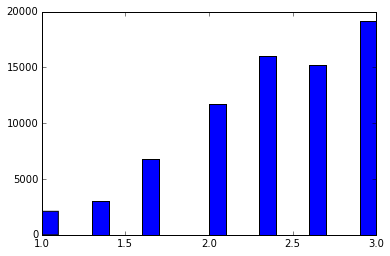

In [239]:
plt.hist(y_train, 20)
plt.show()

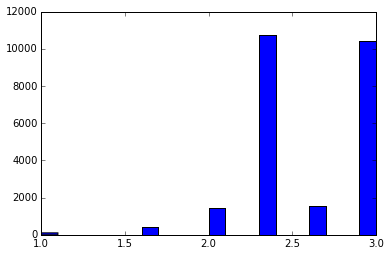

In [306]:
plt.hist(predictions_all[0], 20)
plt.show()

## PCA

In [232]:
print df1.columns
np.around(np.corrcoef(x_train, rowvar=0), 2)

Index([u'search_term_ns_0', u'search_term_ns_1', u'search_term_ns_2',
       u'search_term_ns_3', u'search_term_ns_4', u'search_term_ns_5',
       u'search_term_ns_6', u'search_term_ns_7', u'search_term_ns_8',
       u'search_term_ns_9', u'product_titles_ns_0', u'product_titles_ns_1',
       u'product_titles_ns_2', u'product_titles_ns_3', u'product_titles_ns_4',
       u'product_titles_ns_5', u'product_titles_ns_6', u'product_titles_ns_7',
       u'product_titles_ns_8', u'product_titles_ns_9', u'term_avg_score',
       u'num_chars_in_search', u'ratio_words_matched_search',
       u'ratio_words_matched_title', u'num_stopwords_in_search',
       u'brand_matched', u'material_matched', u'Bullet01_matched',
       u'Bullet02_matched', u'Bullet03_matched', u'Bullet04_matched',
       u'Bullet05_matched', u'Bullet06_matched', u'Bullet07_matched',
       u'Bullet08_matched', u'Bullet09_matched', u'Bullet10_matched',
       u'color_family_matched', u'color_finish_matched', u'first_word_matched'

array([[ 1.  , -0.07, -0.06, ..., -0.03, -0.05, -0.01],
       [-0.07,  1.  , -0.04, ...,  0.01, -0.  , -0.  ],
       [-0.06, -0.04,  1.  , ..., -0.01,  0.  , -0.  ],
       ..., 
       [-0.03,  0.01, -0.01, ...,  1.  , -0.02, -0.01],
       [-0.05, -0.  ,  0.  , ..., -0.02,  1.  , -0.01],
       [-0.01, -0.  , -0.  , ..., -0.01, -0.01,  1.  ]])

In [233]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
print(pca.explained_variance_ratio_) 

[  8.29779612e-01   5.10047403e-02   2.45742289e-02   1.43206058e-02
   1.19300068e-02   9.30124179e-03   6.82486093e-03   5.97816171e-03
   4.71835344e-03   4.27539713e-03   3.56593050e-03   3.11976975e-03
   2.89334897e-03   2.72864314e-03   2.22796209e-03   1.90911322e-03
   1.86686927e-03   1.54889852e-03   1.50775185e-03   1.40597565e-03
   1.18112823e-03   1.14722393e-03   1.02226056e-03   9.97150251e-04
   9.59637525e-04   9.16359631e-04   8.33772968e-04   7.62886843e-04
   5.73455674e-04   5.59401349e-04   4.59237096e-04   4.52774841e-04
   4.35650109e-04   3.89293011e-04   3.40686760e-04   2.97326803e-04
   2.77069552e-04   2.67203908e-04   2.63453565e-04   2.21053486e-04
   2.16801190e-04   2.04661552e-04   1.50996396e-04   1.39749073e-04
   1.30020468e-04   1.08257265e-04   1.05487419e-04   9.86445718e-05
   8.61886631e-05   7.76049346e-05   7.36181615e-05   6.79767319e-05
   6.70659302e-05   6.16046386e-05   5.69795650e-05   5.44557521e-05
   4.72061815e-05   4.53877527e-05

## GraphViz

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 

import graphviz

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

for i, _tree in enumerate(rfc.estimators_):
    with open('figures/tree_' + str(i) + '.dot', 'w') as dotfile:
        dot_data = StringIO() 
        tree.export_graphviz(_tree, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
        
#         graph = pydotplus.graph_from_dot_file('tree_0.dot') 
#         graph.write_pdf("tree.pdf") 

## Results

In [355]:
# new_x_test = x_test

In [ ]:
# new_x_train = x_train

# ith_e = 0
# ensemble_iterations = 5
# while ith_e < ensemble_iterations:
#     curr_x_train = new_x_train
    
#     ith_e += 1
#     print 'ith Ensemble Iteration: {}'.format(ith_e)
    
#     model_optimized = run_model(model_rfr, curr_x_train, y_train)
#     output = model_optimized.predict(curr_x_train)
    
#     new_x_train = np.zeros((curr_x_train.shape[0], curr_x_train.shape[1] + 1))
#     new_x_train[:,:-1] = curr_x_train
#     new_x_train[:,-1] = output

In [366]:
new_x_train = x_train
new_x_test = x_test

rfr = RandomForestRegressor(random_state = 0, verbose = 0)
param_grid = {'n_estimators':[500], 'max_features': [15,25], 'max_depth': [15,25]}
model_rfr = grid_search.GridSearchCV(estimator = rfr, param_grid = param_grid, 
                                     cv = 2, verbose = 20, scoring=RMSE_scorer, n_jobs=-1)

ith_e = 0
ensemble_iterations = 1
while ith_e < ensemble_iterations:
    ith_e += 1
    curr_x_train = new_x_train
    curr_x_test = new_x_test
    
    model_optimized = run_model(model_rfr, curr_x_train, y_train)
    output_train = model_optimized.predict(curr_x_train)

    new_x_train = np.zeros((curr_x_train.shape[0], curr_x_train.shape[1]+1))
    new_x_train[:,:-1] = curr_x_train
    new_x_train[:,-1] = output_train

    output_test = model_optimized.predict(curr_x_test)
    new_x_test = np.zeros((curr_x_test.shape[0], curr_x_test.shape[1]+1))
    new_x_test[:,:-1] = curr_x_test
    new_x_test[:,-1] = output_test


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 jobs       | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   1 out of   8 | elapsed:  4.2min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  5.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  5.1min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  5.9min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  5.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   7 out of   8 | elapsed:  6.8min remaining:   58.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  6.8min finished


Best parameters found by grid search:
{'max_features': 25, 'n_estimators': 500, 'max_depth': 15}
Best CV score:
-0.445188510102
[CV] max_features=15, n_estimators=500, max_depth=15 .................
[CV] max_features=15, n_estimators=500, max_depth=15 .................
[CV] max_features=25, n_estimators=500, max_depth=15 .................
[CV] max_features=25, n_estimators=500, max_depth=15 .................
[CV] max_features=15, n_estimators=500, max_depth=25 .................
[CV] max_features=15, n_estimators=500, max_depth=25 .................
[CV] max_features=25, n_estimators=500, max_depth=25 .................
[CV] max_features=25, n_estimators=500, max_depth=25 .................
[CV]  max_features=15, n_estimators=500, max_depth=15, score=-0.445801 - 4.2min[CV]  max_features=15, n_estimators=500, max_depth=15, score=-0.445393 - 4.1min[CV]  max_features=25, n_estimators=500, max_depth=15, score=-0.445797 - 5.9min[CV]  max_features=25, n_estimators=500, max_depth=15, score=-0.444

In [343]:
# # rfr = RandomForestRegressor(max_depth=10, max_features=20, n_estimators=50, random_state=0)
# model_optimized.fit(new_x_train, y_train)
# preds = model_optimized.predict(x_test)

In [367]:
preds = output_test

In [368]:
import csv
import os

with open('results/results_rfr_ensemble.csv', 'wb') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['id', 'relevance'])
    for id, pred in zip(df_test.id.values, preds):
        csv_writer.writerow([id, pred])

In [ ]:
# from sklearn.cross_validation import StratifiedKFold
# from itertools import product
# from xgboost.sklearn import XGBClassifier

# def run_kfold_process(clf, labels, predict_method, classification, partial_train=1):
    
#     if partial_train < 1:
#         y_partial_train = y_train[:int(len(y_train) * partial_train)]
#     else:
#         y_partial_train = y_train
        
#     folds = 2
#     kfold = StratifiedKFold(y=y_partial_train, n_folds=folds, shuffle=True, random_state=0)
#     param_alpha = [0.1, 1, 10]
#     history_rmse = [100]
        
#     predictions_all = []
    
#     if predict_method == 'clf':
#         cum_score = 0
#         cum_score_train = 0
        
#         for k, (train, test) in enumerate(kfold):
#             clf.fit(x_train[train], labels[train])
            
#             if classification:
#                 pass
# #                 output = []
# #                 predicted_probs = clf.predict_proba(x_test[test])
                
# #                 for predicted_prob in predicted_probs:
# #                     output.append(le.inverse_transform(np.argsort(predicted_prob))[::-1][0])
                    
#             else:
#                 output_train = clf.predict(x_test[train])
#                 output = clf.predict(x_test[test])
                
#             print 'function_call k: {}, rmse: {}'.format(k, RMSE(y_train[test], output))
                                           
# #             rfr = RandomForestRegressor(max_depth=max_depth, max_features=max_features, n_estimators=30, random_state=0)
# #             rfr.fit(x_train[train], y_train[train])
# #             y_pred = rfr.predict(x_train[test])

# #             print 'k:{}, rmse: {}'.format(k, RMSE(y_train[test], y_pred))
        
#             cum_score_train += RMSE(y_train[train], output_train) # not applied to classification yet
#             cum_score += RMSE(y_train[test], output)
            
#             predictions = output
#             predictions_all.append(predictions)
                        
#         rmse = cum_score / float(folds)
#         rmse_train = cum_score_train / float(folds)
# #         print 'k: {}, RMSE (test): {}, best: {}'.format(k, rmse, rmse <= min(history_rmse))
# #         print 'k: {}, RMSE (train): {}, best: {}'.format(k, rmse_train, rmse <= min(history_rmse))
#         history_rmse.append(rmse)
    
# #     elif predict_method == 'mean_clf':
# #         param_weights = [0, 0.1, 0.2, 0.3]
# #         for weight in param_weights:
# #             cum_score = 0
# #             for k, (train, test) in enumerate(kfold):
                
# #                 clf.fit(x_train[train], labels[train])
# #                 output = clf.predict(x_test[test])
                
# #                 predictions = weight * output + u
# #                 cum_score += RMSE(y_train[test], predictions)
# #                 predictions_all.append(predictions)
            
# #             rmse = cum_score / float(folds)
# #             print 'k: {}, weight: {}, RMSE: {}, best: {}'.format(k, weight, rmse, rmse <= min(history_rmse))
# #             history_rmse.append(rmse)
    
#     return predictions_all

# # predict_method: 'mean', 'clf', 'mean_clf' 
# # label_method: 'absolute', 'relative'
# def train_clf(clf, features=None, predict_method = 'mean_clf', training_label_method = 'absolute', 
#               classification=False, partial_train=1):    
    
#     if predict_method == 'mean':
        
#         # no training required
#         predictions = 0 * y_train + u
#         print RMSE(y_train, predictions)
    
#     else:
#         if classification:
#             labels = le.fit_transform(y_train)
#         else:
#             if training_label_method == 'absolute':
#                 labels = y_train
#             elif training_label_method == 'relative':
#                 labels = y_train - u
        
#         predictions_all = run_kfold_process(clf, labels, predict_method, classification, partial_train=partial_train)
        
#         return predictions_all